# This notebook calculates fills a contourn map with hexagons

It reads a map in geopandas, and applies hexagonal tessellation

To the best knowledge of the author, this code has been developed without the use of GenAI.

References:
https://python.plainenglish.io/creating-beautiful-hexagon-maps-with-python-25c9291eeeda


Created on 2021-May-16 by Edwin Campos

Last modification on 2025-May-17 by ecampos.phd@gmail.com

## Global Variables

In [1]:
WHICH_STATE = 1  # Use 0:'Florida' or 1:'Virginia'
state_str = ['Florida','Virginia'][WHICH_STATE]  # String

## Dependencies

In [2]:
# import ellipsis

try:
  import ellipsis as el
except:
  ! pip install ellipsis
  import time
  time.sleep(10) # Sleep for 10 seconds to give pip a chance to finish installing the library
  import ellipsis as el
#! pip install ellipsis

/Users/ecampos/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Install h3pandas: H3-Pandas integrates H3, the hexagonal geospatial indexing system, with Pandas and GeoPandas.
try:
    import h3pandas
except:
    ! pip install h3pandas
    import time
    time.sleep(10) # Sleep for 10 seconds to give pip a chance to finish installing the library
    import h3pandas
# ! pip install h3pandas

In [4]:
import matplotlib.pyplot as plt

    # Check the pandas version
    import pandas as pd
    pd.__version__

## Input Countries Data

In [5]:
#import ellipsis as el

pathId = '1a24a1ee-7f39-4d21-b149-88df5a3b633a'
timestampId = '45c47c8a-035e-429a-9ace-2dff1956e8d9'

sh_countries = el.path.vector.timestamp.listFeatures(pathId, timestampId)['result']

display(sh_countries)

,geometry,UN,LAT,LON,AREA,FIPS,ISO2,ISO3,NAME,REGION,POP2005,SUBREGION,id,userId
0,"MULTIPOLYGON (((-8.29089 70.97415, -8.39447 70...",744,78.830,18.374,0,SV,SJ,SJM,Svalbard,150,0,154,029f00d1-0993-44d8-8b23-36ce55ed3d67,9113af2b-943f-4689-b5f4-e575167d5a38
1,"MULTIPOLYGON (((34.33416 31.25972, 34.26758 31...",275,32.037,35.278,0,None,PS,PSE,Palestine,142,3762005,145,0774db4e-eeb6-4b79-aeaa-3ee0d496f1f9,9113af2b-943f-4689-b5f4-e575167d5a38
2,"MULTIPOLYGON (((50.81249 25.64222, 50.79250 25...",48,26.019,50.562,71,BA,BH,BHR,Bahrain,142,724788,145,07c8739a-d2a5-42fb-86b8-8380a7157434,9113af2b-943f-4689-b5f4-e575167d5a38
3,"MULTIPOLYGON (((-61.24556 15.87167, -61.25667 ...",312,16.286,-61.441,169,GP,GP,GLP,Guadeloupe,19,438403,29,08315796-792b-4c91-bbb7-abfa3a095fbf,9113af2b-943f-4689-b5f4-e575167d5a38
4,"MULTIPOLYGON (((-178.04251 -14.31945, -178.060...",876,-14.289,-178.131,14,WF,WF,WLF,Wallis and Futuna Islands,9,15079,61,0834d3e0-0c2d-48f6-8dc9-d43f0615d7f1,9113af2b-943f-4689-b5f4-e575167d5a38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,"MULTIPOLYGON (((-24.36834 14.81222, -24.39000 ...",132,15.071,-23.634,403,CV,CV,CPV,Cape Verde,2,506807,11,f8dcbf5e-04be-4c79-983c-676fc5cd6ea7,9113af2b-943f-4689-b5f4-e575167d5a38
242,"MULTIPOLYGON (((-67.21278 -55.89362, -67.24695...",152,-23.389,-69.433,74880,CI,CL,CHL,Chile,19,16295102,5,fb3039b7-86c2-434d-8d55-193581fb7823,9113af2b-943f-4689-b5f4-e575167d5a38
243,"POLYGON ((34.96139 29.36083, 34.96000 29.36833...",400,30.703,36.319,8824,JO,JO,JOR,Jordan,142,5544066,145,fe3893d4-ed2a-4d95-9796-80bf2a9e8414,9113af2b-943f-4689-b5f4-e575167d5a38
244,"MULTIPOLYGON (((-87.80334 17.29417, -87.80917 ...",84,17.219,-88.602,2281,BH,BZ,BLZ,Belize,19,275546,13,fedc71b1-c317-467e-9681-8bbc0f323da2,9113af2b-943f-4689-b5f4-e575167d5a38


<Axes: >

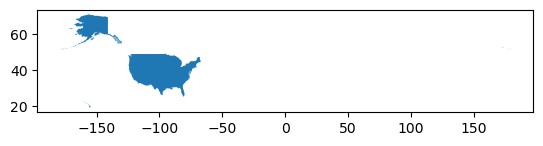

In [6]:
sh_usa = sh_countries[sh_countries['NAME'] == 'United States']
sh_usa.plot()


In [7]:
sh_usa.columns

Index(['geometry', 'UN', 'LAT', 'LON', 'AREA', 'FIPS', 'ISO2', 'ISO3', 'NAME',
       'REGION', 'POP2005', 'SUBREGION', 'id', 'userId'],
      dtype='object')

In [8]:
print(type(sh_usa))
print(sh_usa.crs)
print(type(sh_usa.crs))

<class 'geopandas.geodataframe.GeoDataFrame'>
EPSG:4326
<class 'pyproj.crs.crs.CRS'>


> Note: Hexagonal Tessellation with h3pandas **requires the geopandas points to be in units of Lon,Lat.**

Thus, make sure the geodataframe **crs='EPSG:4326'** ==> points are in a lon, lat coordinate system ==> EPSG:4326 or WGS 84

For this, one can use the command

geodataframe_latlon = geodataframe.to_crs(epsg=4326)

<Axes: >

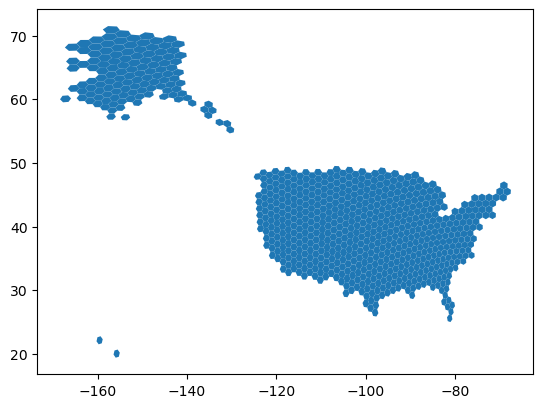

In [9]:
#import h3pandas
resolution = 3
hexagons = sh_usa.h3.polyfill_resample(resolution)
hexagons.plot()

## Input USA States data

In [10]:
import geopandas

In [11]:
TEMP_DIR = 'maps_temp'

In [12]:
# USA States at 1 : 20,000,000 scale (national)
LOCAL_SHAPES ='cb_2019_us_state_20m.zip'
URL_CENSUS = 'https://www2.census.gov/geo/tiger/GENZ2019/shp/'+LOCAL_SHAPES
#URL_CENSUS = 'https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_state_20m.zip'  
#LOCAL_SHAPES = 'getstateshape_shapes.zip'

In [13]:
import requests
downloaded_obj = requests.get(URL_CENSUS)
# Save the zip file in the local directory
with open(LOCAL_SHAPES, 'wb') as file:
    file.write(downloaded_obj.content)

In [14]:
import os
# Create required folders
if not os.path.exists(TEMP_DIR):
    os.makedirs(TEMP_DIR)

In [15]:
from zipfile import ZipFile
with ZipFile(LOCAL_SHAPES, 'r') as zipObj:
    #listOfFileNames = zipObject.namelist()
    # Extract all the contents of zip file in directory 'temp'
   zipObj.extractall(TEMP_DIR)  

In [16]:
geodf = geopandas.read_file(TEMP_DIR)

In [17]:
state_gdf = geodf[geodf['NAME'] == state_str]

In [18]:
print(type(state_gdf))
print( state_gdf.crs)
print(type(state_gdf.crs))

<class 'geopandas.geodataframe.GeoDataFrame'>
EPSG:4269
<class 'pyproj.crs.crs.CRS'>


> Note: Hexagonal Tessellation with h3pandas **requires the geopandas points to be in units of Lon,Lat.**

Thus, make sure the geodataframe **crs='EPSG:4326'** ==> points are in a lon, lat coordinate system ==> EPSG:4326 or WGS 84

For this, one can use the command

geodataframe_latlon = geodataframe.to_crs(epsg=4326)

In [19]:
# Convert geometries into Latitude and Longitude
state_gdf = state_gdf.to_crs(epsg=4326)

Saving plot as  ./outputs/HexagonalTessellation_hexagons_Virginia.png


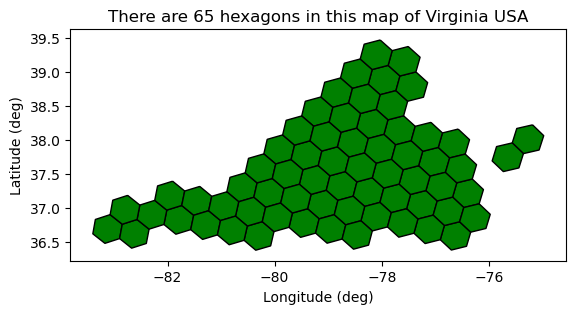

In [29]:
import h3pandas

resolution = 4
hexagons = state_gdf.h3.polyfill_resample(resolution)

n_hexagons = len(hexagons)

#hexagons.plot(color='green')
hexagons.plot(facecolor="green", edgecolor="black", linewidth=1)
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
plt.title('There are %i hexagons in this map of %s USA'% (n_hexagons,state_str))

output_filename = './outputs/HexagonalTessellation_hexagons_'+state_str+'.png'
print('Saving plot as ', output_filename)
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

Saving plot as  ./outputs/HexagonalTessellation_map_Virginia.png


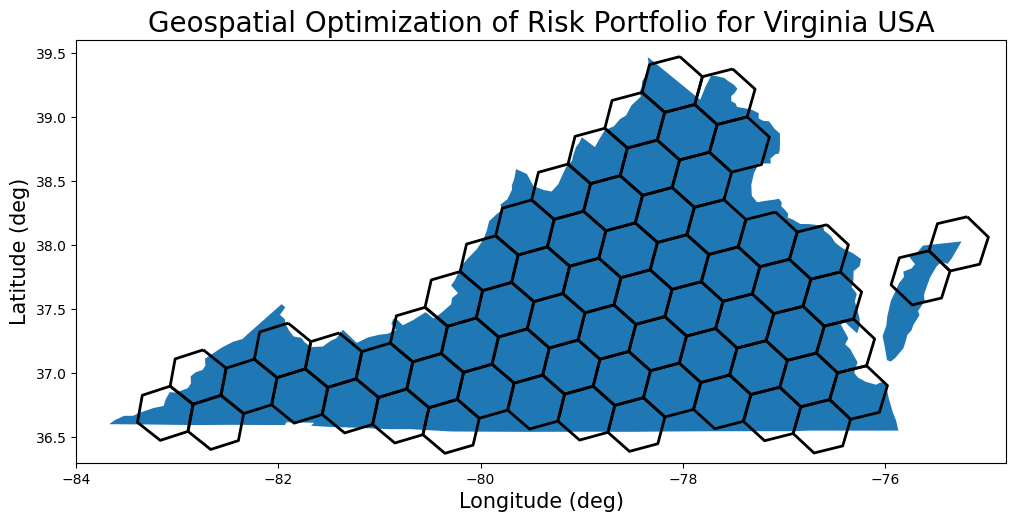

In [42]:
# Visualize data
ax = state_gdf.plot(figsize=(12,9), #color='orange',
                    #facecolor="none", edgecolor="orange", linewidth=5,
                    zorder=0) # Remember that state_gdf is using crs: epsg=4326
hexagons.plot(legend=True, # Make sure to match to the CRS of the ax, i.e. state_gdf geodataframe
              facecolor="none", edgecolor="black", linewidth=2, 
              ax=ax,zorder=2) 

ax.set_title('Geospatial Optimization of Risk Portfolio for %s USA' %state_str)
ax.title.set_size(20)           # change text size of Figure Title
plt.ylabel('Latitude (deg)')
ax.yaxis.label.set_size(15)     # change xlabel size
plt.xlabel('Longitude (deg)')
ax.xaxis.label.set_size(15)     # change xlabel size

if WHICH_STATE == 0:  # Use 0:'Florida' or 1:'Virginia'
    plt.ylim(24,32) # Florida
    plt.xlim(-89,-79)
else: # if WHICH_STATE == 1:
    plt.ylim(36.3,39.6) # Virginia
    plt.xlim(-84,-74.8)

output_filename = './outputs/HexagonalTessellation_map_'+state_str+'.png'
print('Saving plot as ', output_filename)
plt.savefig(output_filename, dpi=300, bbox_inches='tight')